In [23]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Combining multiple features with statistical operations
New features can be created by performing mathematical and statistical operations over existing variables.

In [2]:
dataset = load_breast_cancer()
data = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
mean_data = data[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                  'mean smoothness', 'mean compactness', 'mean concavity',
                  'mean concave points', 'mean symmetry', 'mean fractal dimension']]
mean_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [5]:
agg_data = mean_data.agg(['sum','prod','std','min','max','mean'],axis='columns')
agg_data

,sum,prod,std,min,max,mean
0,1153.33381,634.127481,313.491911,0.07871,1001.0,115.333381
1,1497.79832,26.878489,415.309441,0.05667,1326.0,149.779832
2,1374.80169,359.359966,376.525110,0.05999,1203.0,137.480169
3,496.61014,181.243461,120.635222,0.09744,386.1,49.661014
4,1467.50513,149.249349,406.300561,0.05883,1297.0,146.750513
...,...,...,...,...,...,...
564,1665.78853,428.833500,463.211751,0.05623,1479.0,166.578853
565,1441.25364,130.033382,394.520327,0.05533,1261.0,144.125364
566,1011.62786,16.503688,268.077417,0.05302,858.1,101.162786
567,1456.23806,3138.599948,395.681548,0.07016,1265.0,145.623806


c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


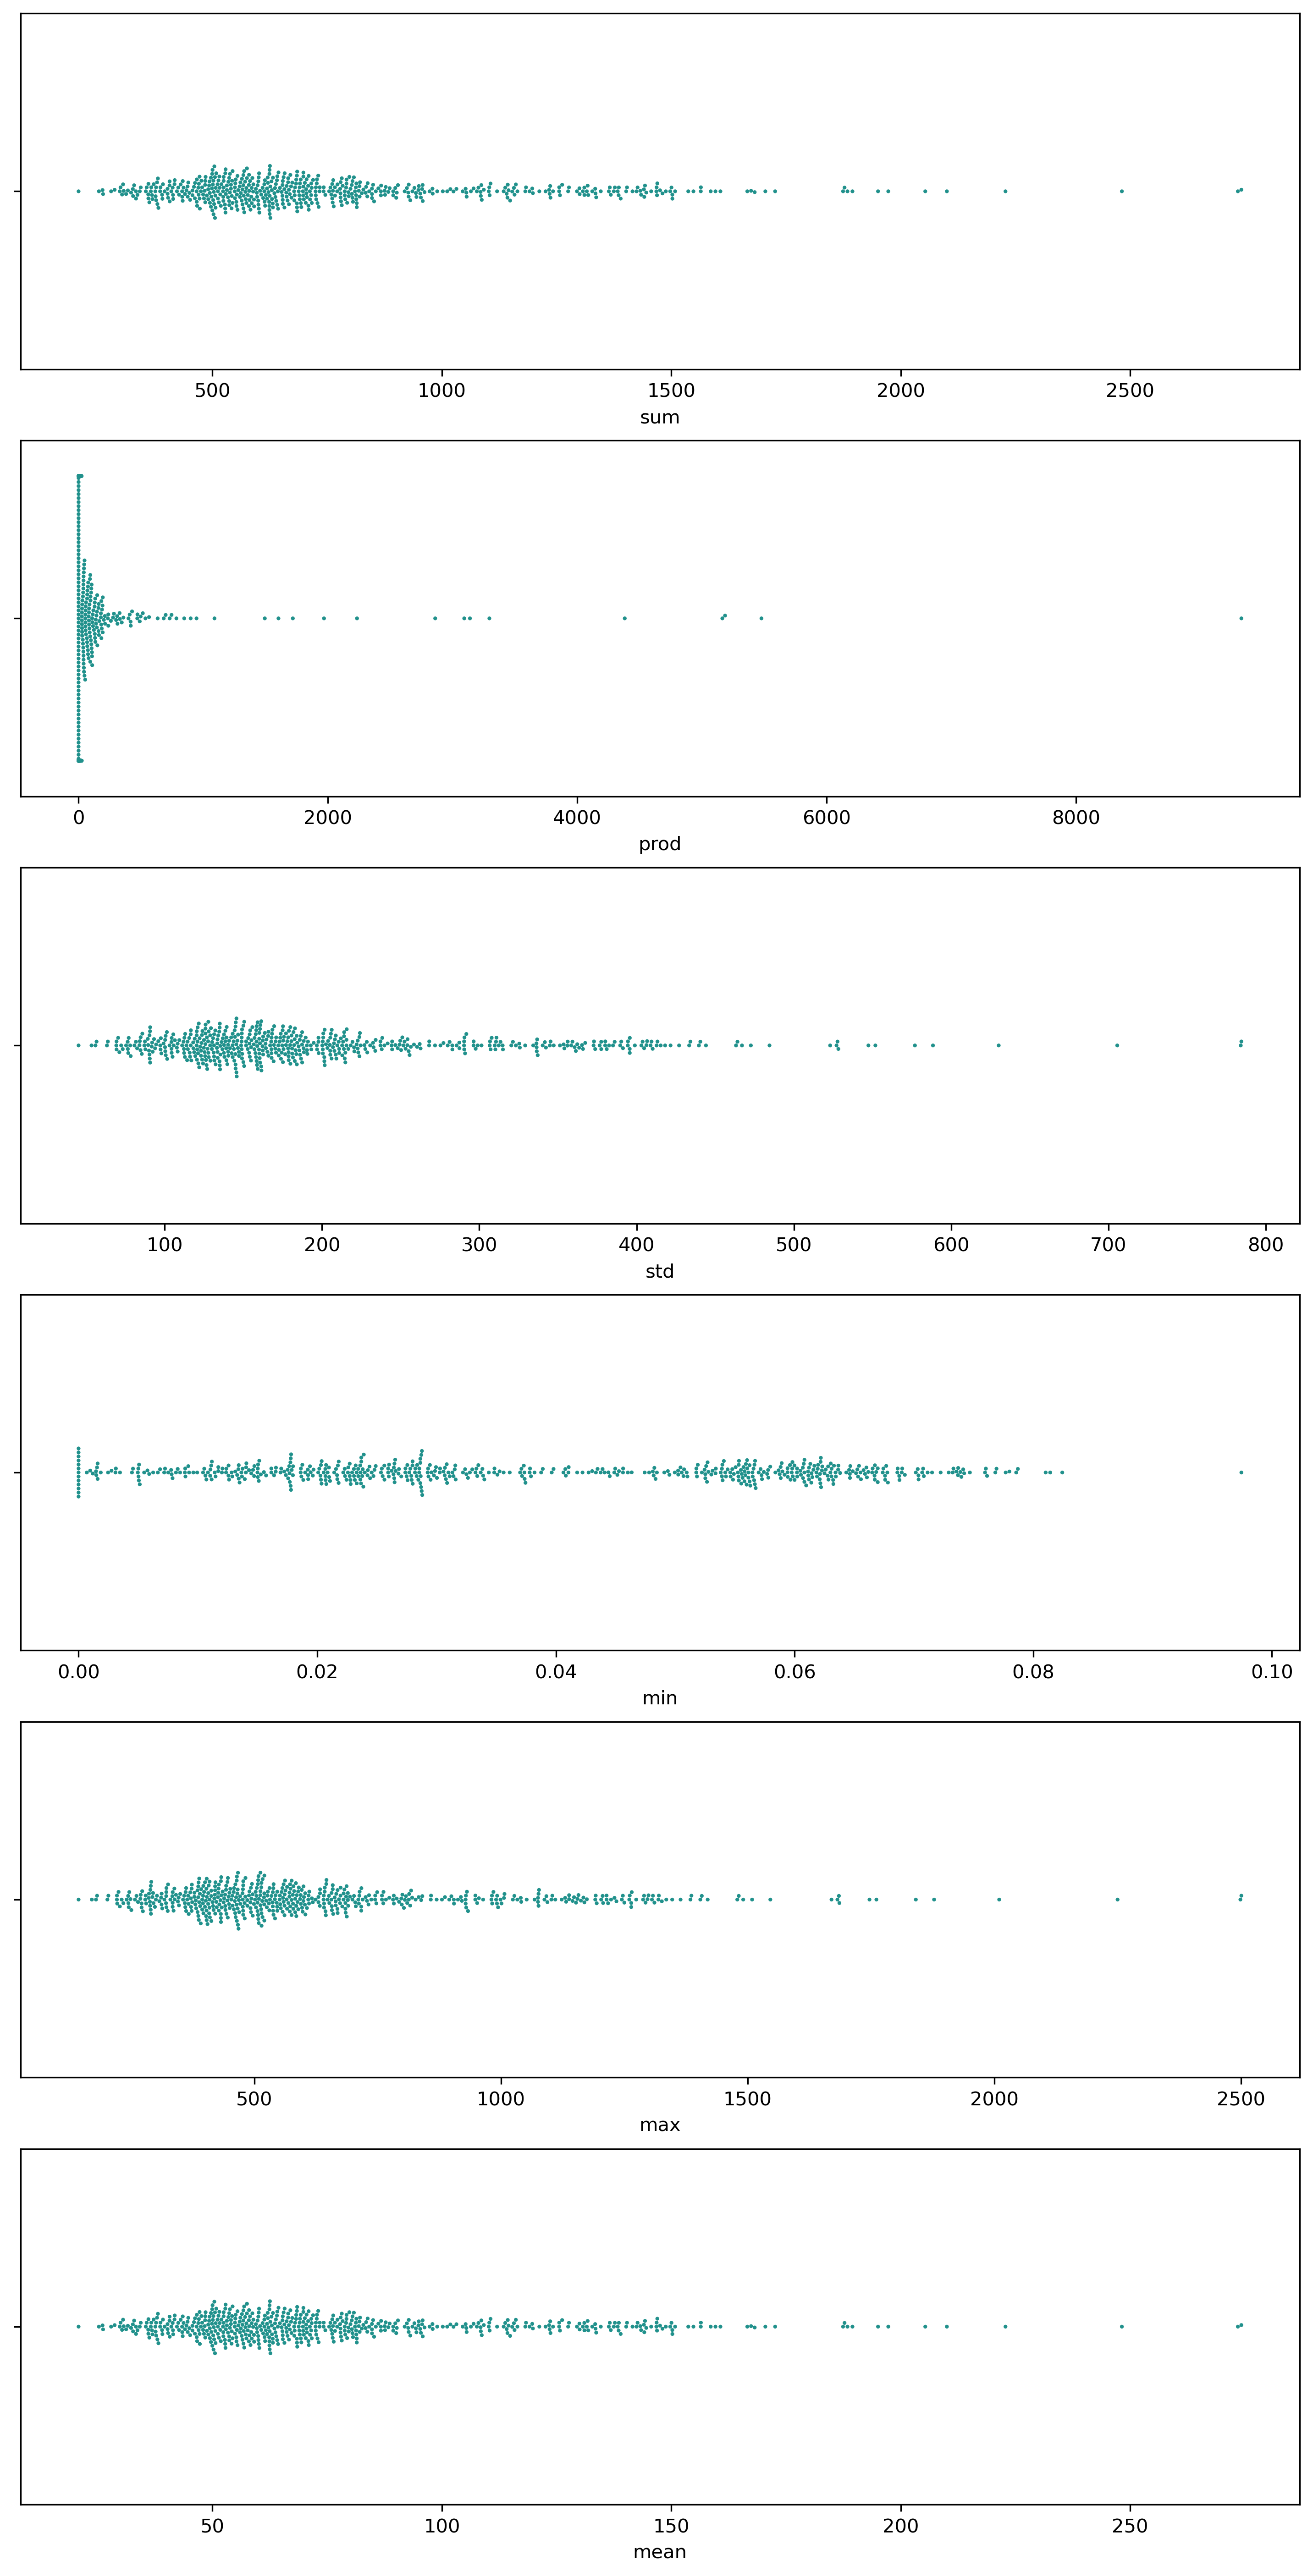

In [6]:
fig,axes = plt.subplots(nrows=6,ncols=1,figsize=[12,24],dpi=300)
axes = axes.ravel()

for i in range(agg_data.shape[1]):
    sns.swarmplot(x=agg_data.columns[i],data=agg_data,palette='viridis',size=2,ax=axes[i])

plt.show()

## Combining pairs of features with mathematical functions

In [7]:
worst_data = data[['worst radius', 'worst texture', 'worst perimeter',
                   'worst area', 'worst smoothness', 'worst compactness',
                   'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']]
worst_data

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


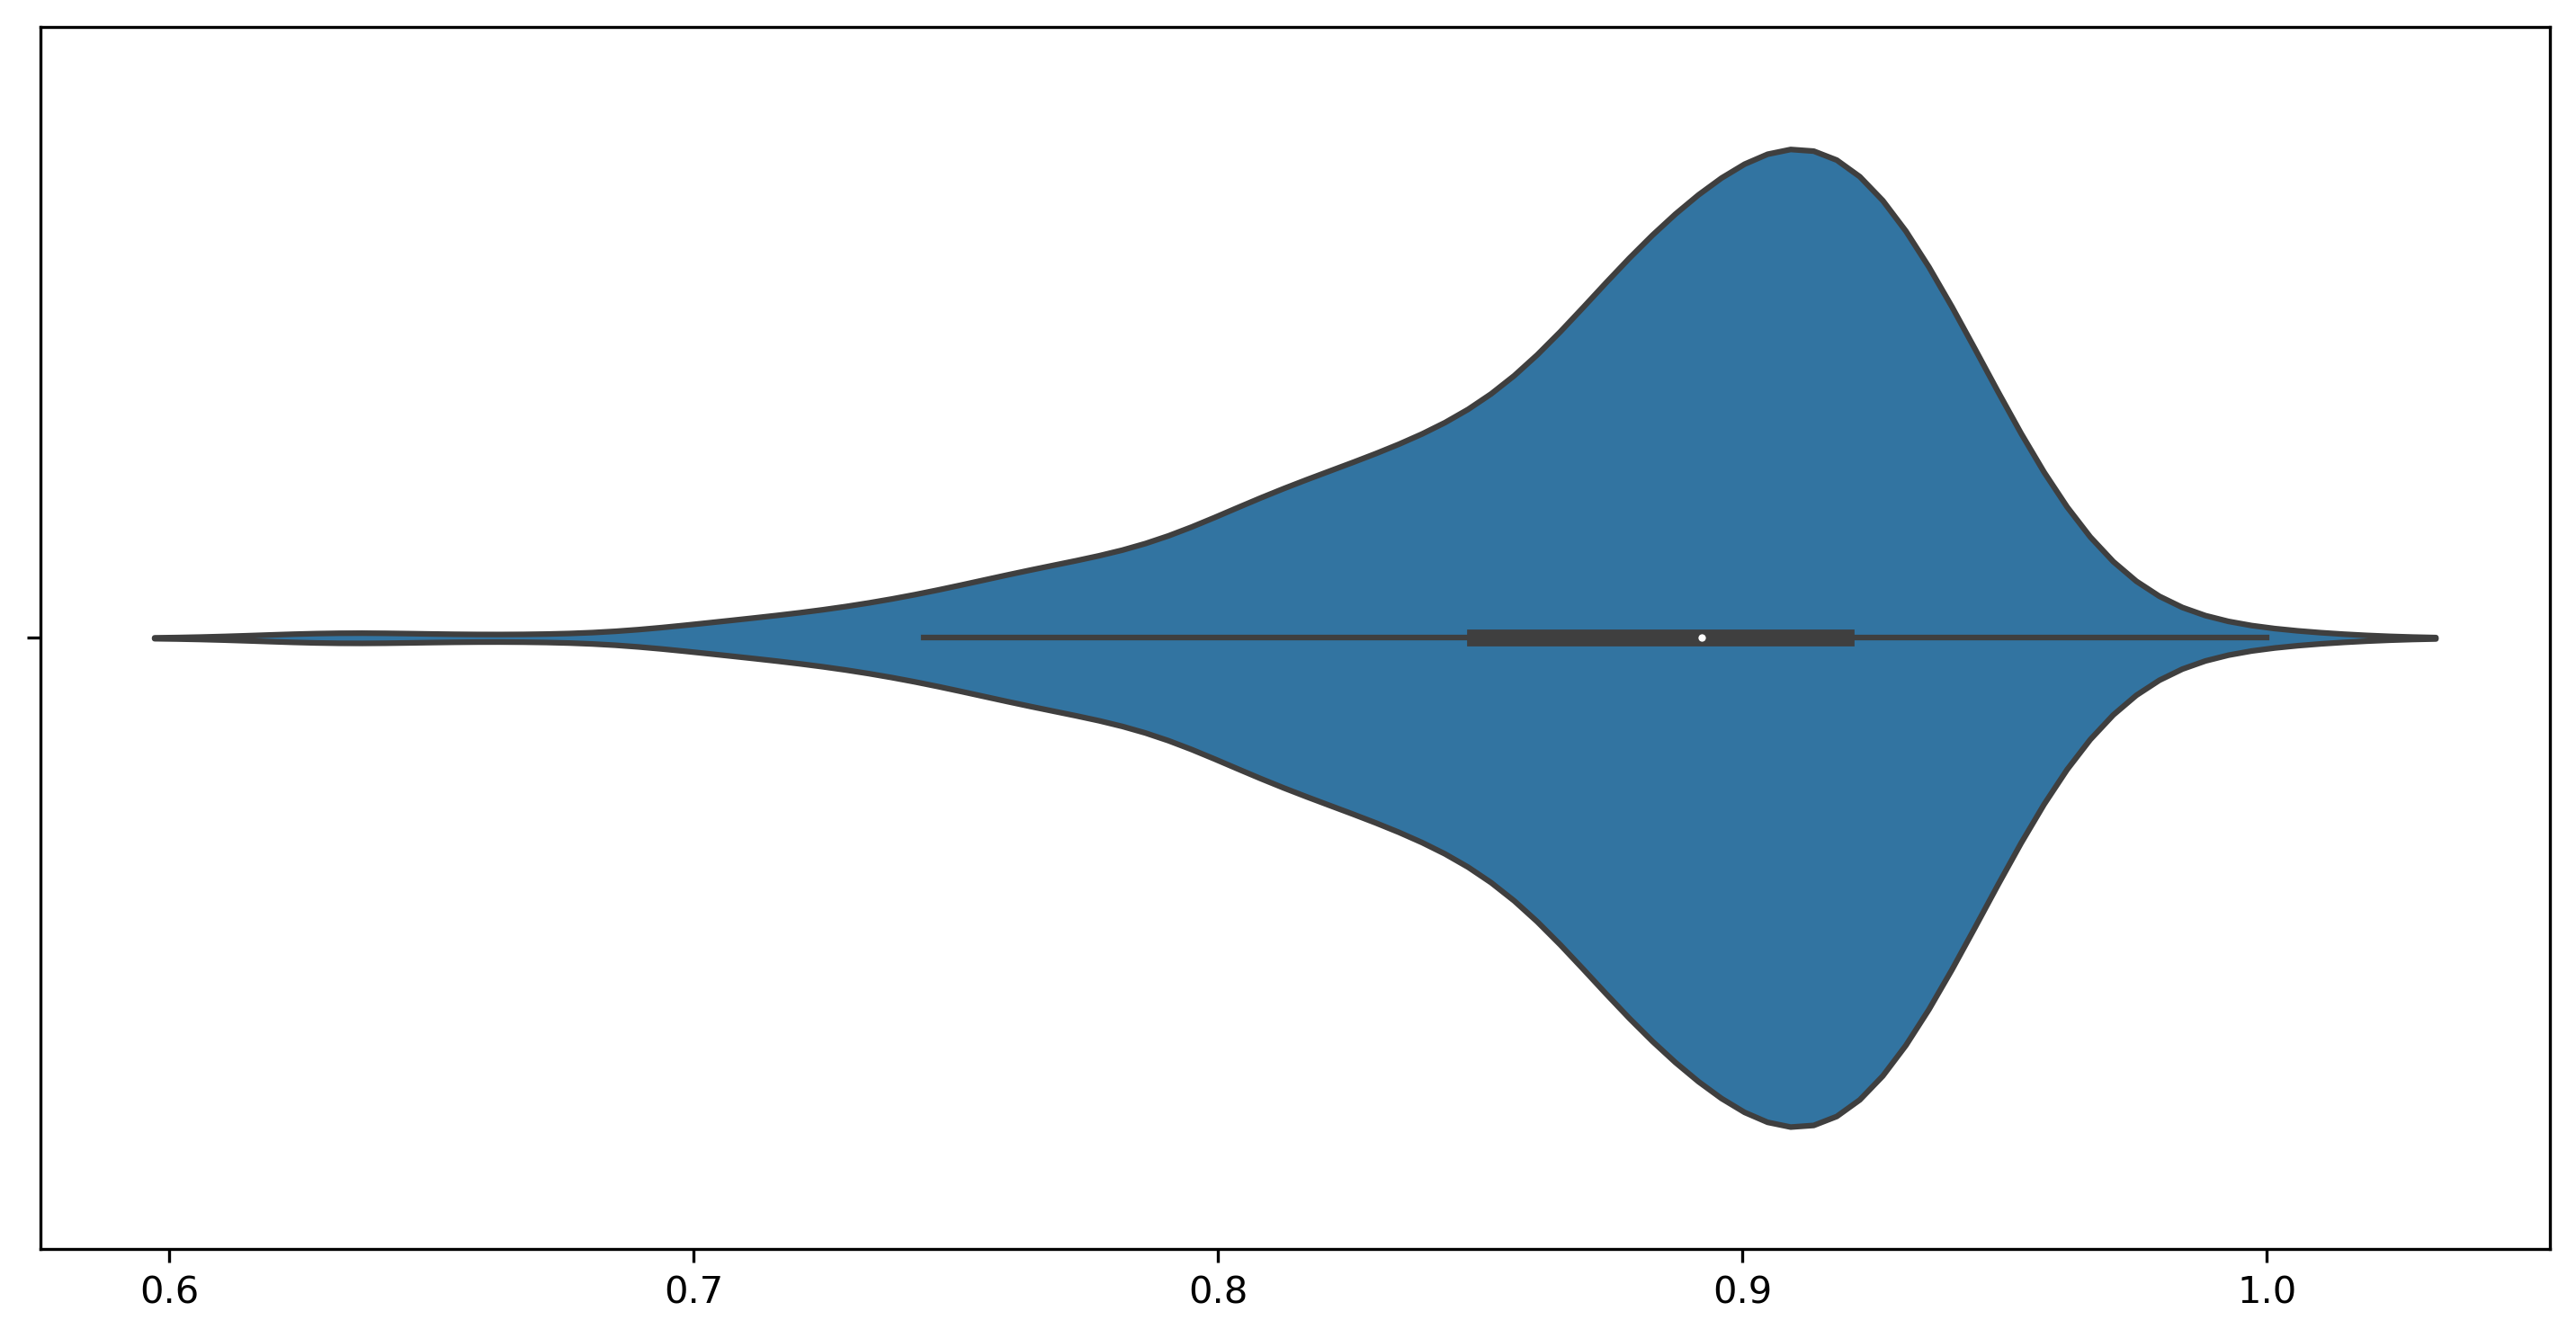

In [8]:
plt.figure(figsize=[12,6],dpi=300)
sns.violinplot(x=mean_data['mean radius'].div(worst_data['worst radius']))
plt.show()

## Performing polynomial expansion
A combination of one feature with itself, that is, a polynomial combination of the same feature, can also be quite
informative or increase the predictive power of our algorithms. For example, in cases where the target follows a
quadratic relationship with a variable, creating a second degree polynomial of the feature allows us to use it in
a linear model.

- Keep in mind that high polynomial degrees or a large number of features to combine will return an enormous
number of new features.
- Second degree polynomial combinations of three variables—a, b, and c—return the following new features:

**[a, b, c]<sup>2</sup> = 1, a, b, c, ab, ac, bc, a<sup>2</sup>, b<sup>2</sup>, c<sup>2</sup>, abc**
- Third degree polynomial combinations of the three variables—a, b, and c—return the following new features:

**[a, b, c]<sup>3</sup> = 1, a, b, c, ab, ac, bc, abc, a<sup>2</sup>b, a<sup>2</sup>c, b<sup>2</sup>a, b<sup>2</sup>c,
c<sup>2</sup>a, c<sup>2</sup>b, a<sup>3</sup>, b<sup>3</sup>, c<sup>3</sup>**

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 3600x3600 with 0 Axes>

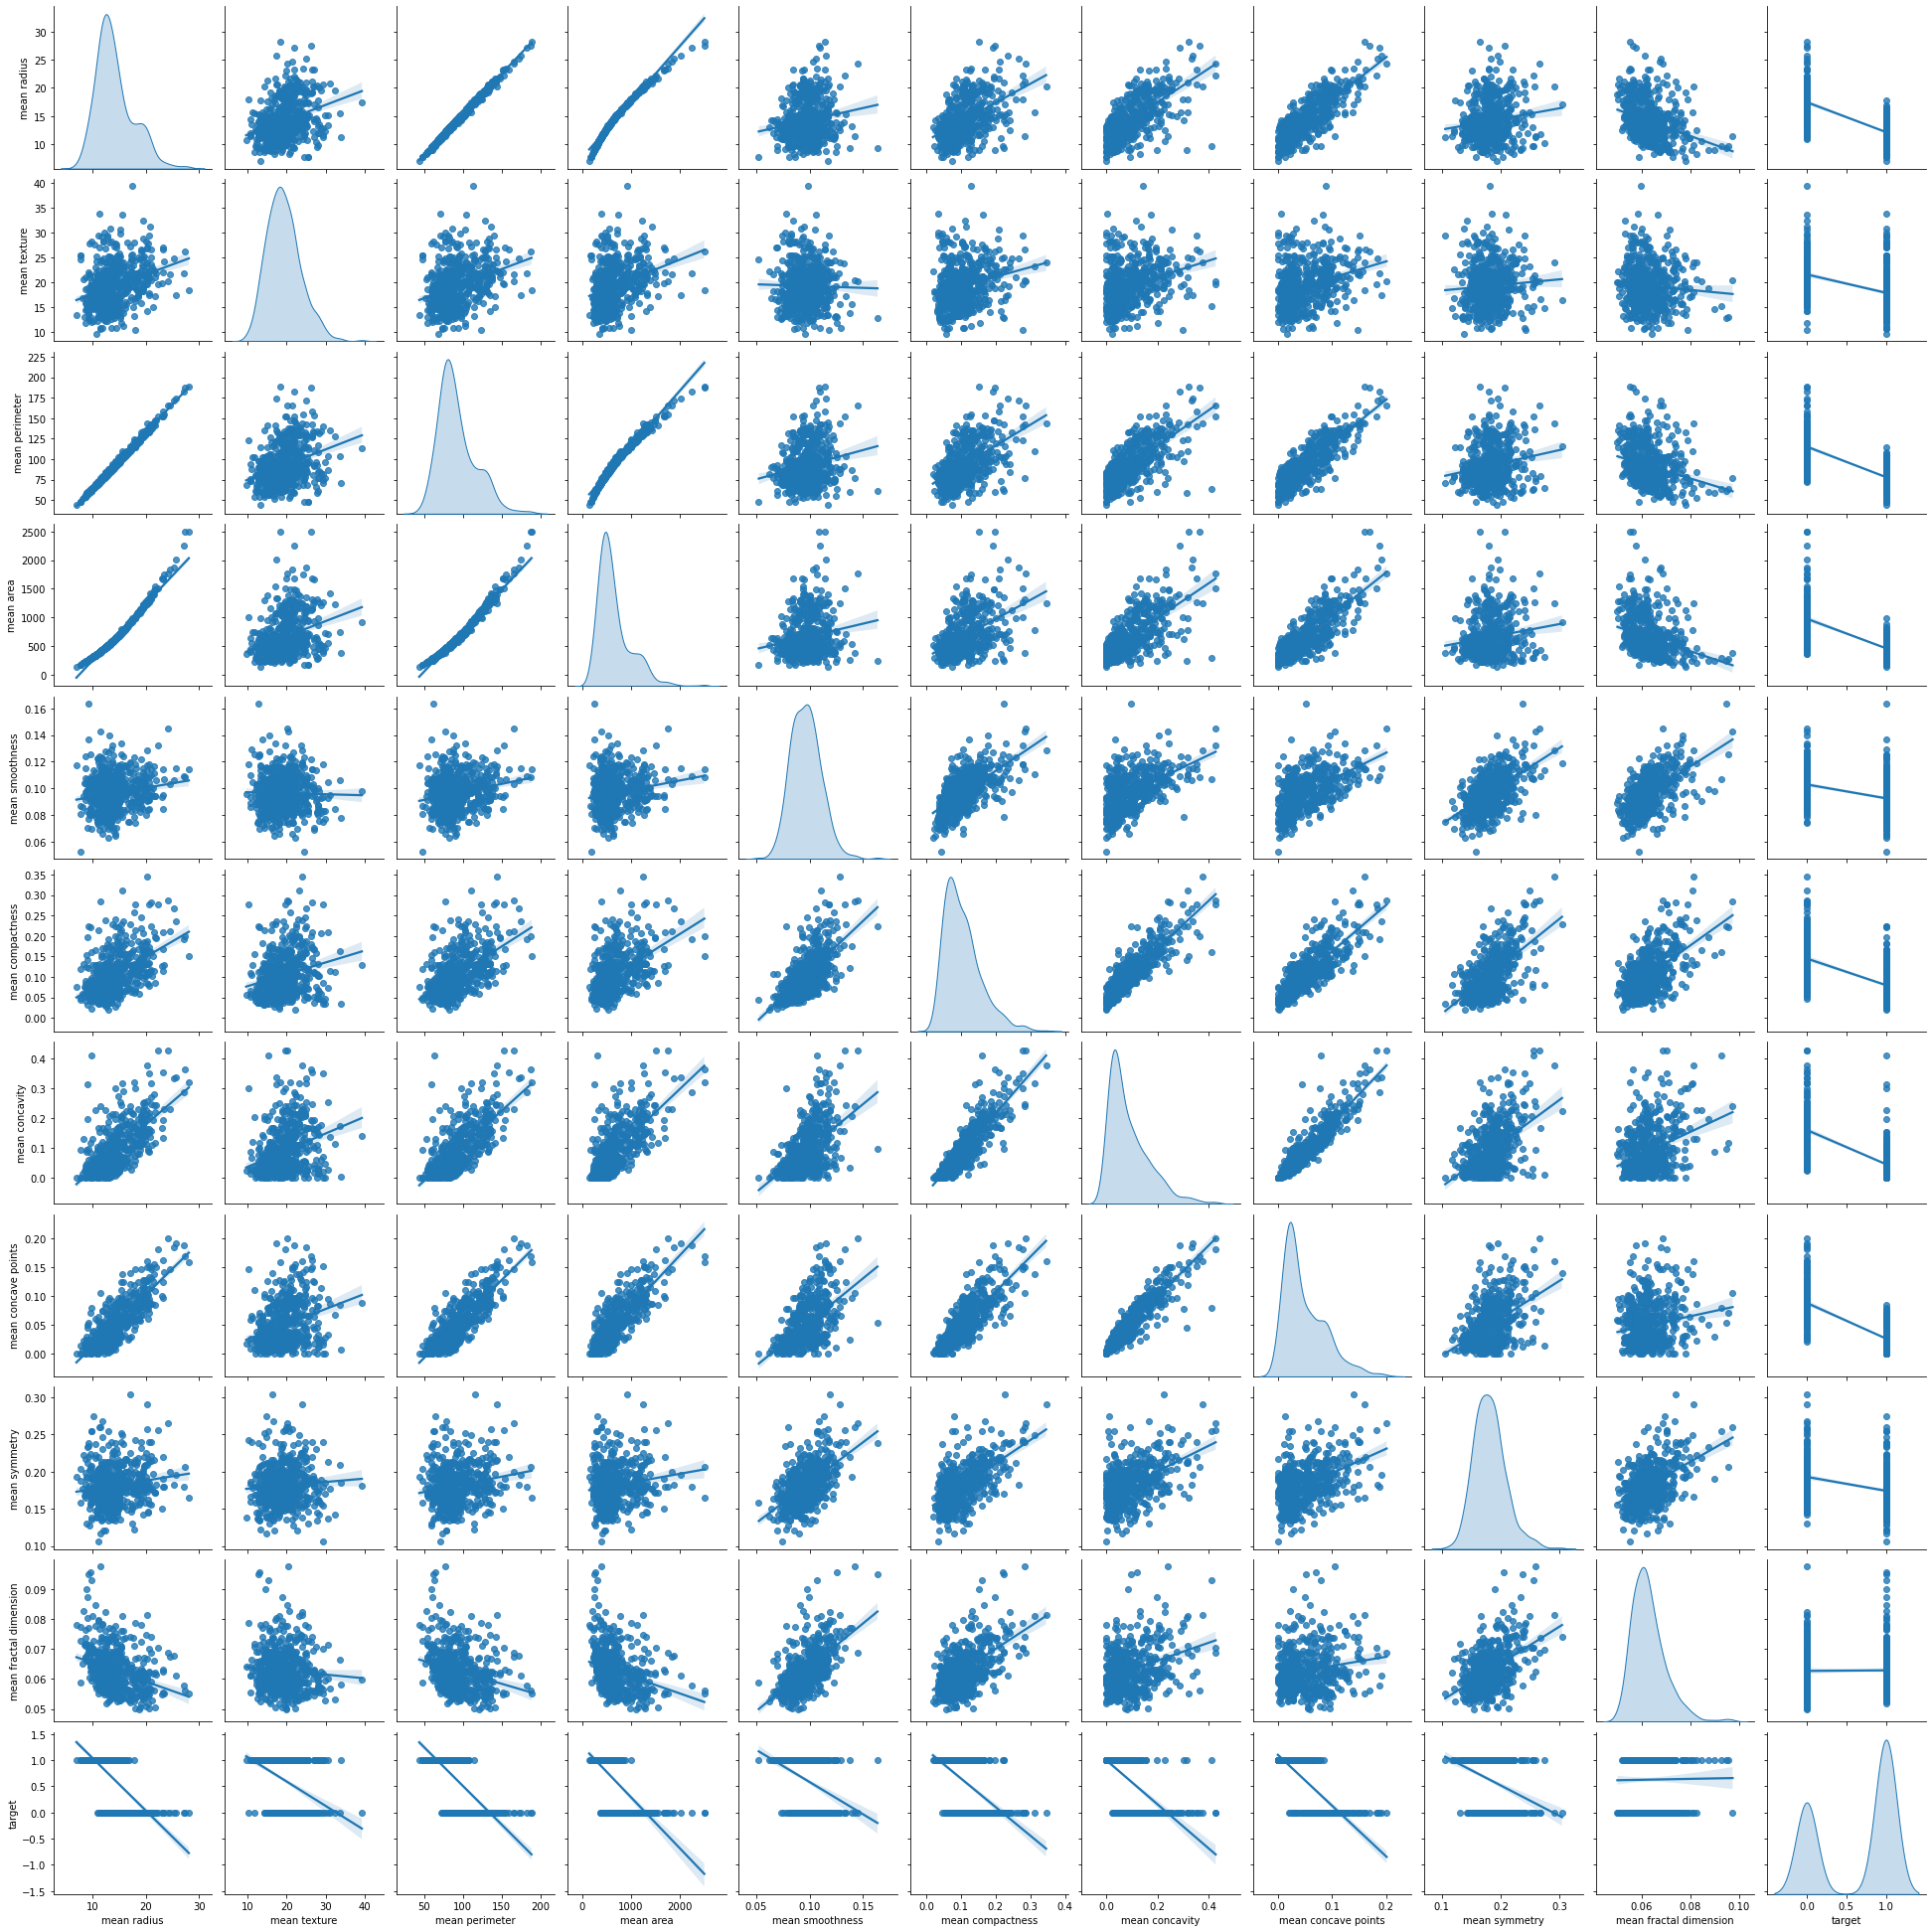

In [13]:
mean_data['target'] = dataset.target
plt.figure(figsize=[12,12],dpi=300)
sns.pairplot(mean_data,kind='reg',diag_kind='kde')
plt.show()

In [17]:
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
poly.fit(mean_data['mean fractal dimension'].values.reshape(-1,1))
poly.transform(mean_data['mean fractal dimension'].values.reshape(-1,1))

array([[0.07871   , 0.00619526],
       [0.05667   , 0.00321149],
       [0.05999   , 0.0035988 ],
       ...,
       [0.05648   , 0.00318999],
       [0.07016   , 0.00492243],
       [0.05884   , 0.00346215]])

<Figure size 3600x3600 with 0 Axes>

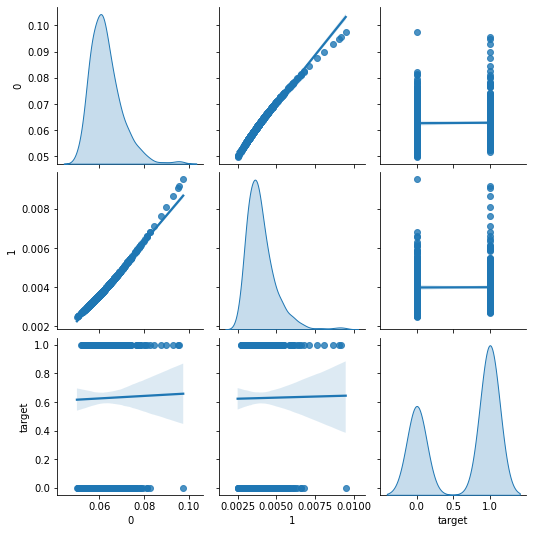

In [21]:
temp = pd.DataFrame(poly.transform(mean_data['mean fractal dimension'].values.reshape(-1,1)))
temp['target'] = dataset.target
plt.figure(figsize=[12,12],dpi=300)
sns.pairplot(temp,
             kind='reg',
             diag_kind='kde')
plt.show()

## Deriving new features with decision trees
Creating new features with decision trees not only creates monotonic relationships between features and target, but it
also captures feature interactions, which is useful when building models that do not do so automatically, such as linear
models.

In [26]:
mean_data.drop(['target'],axis=1,inplace=True)
parm_grid = {'max_depth':[3,4,None]}
tree = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    cv=5,
                    param_grid=parm_grid)
tree.fit(mean_data,dataset.target)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, None]})

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 3600x3600 with 0 Axes>

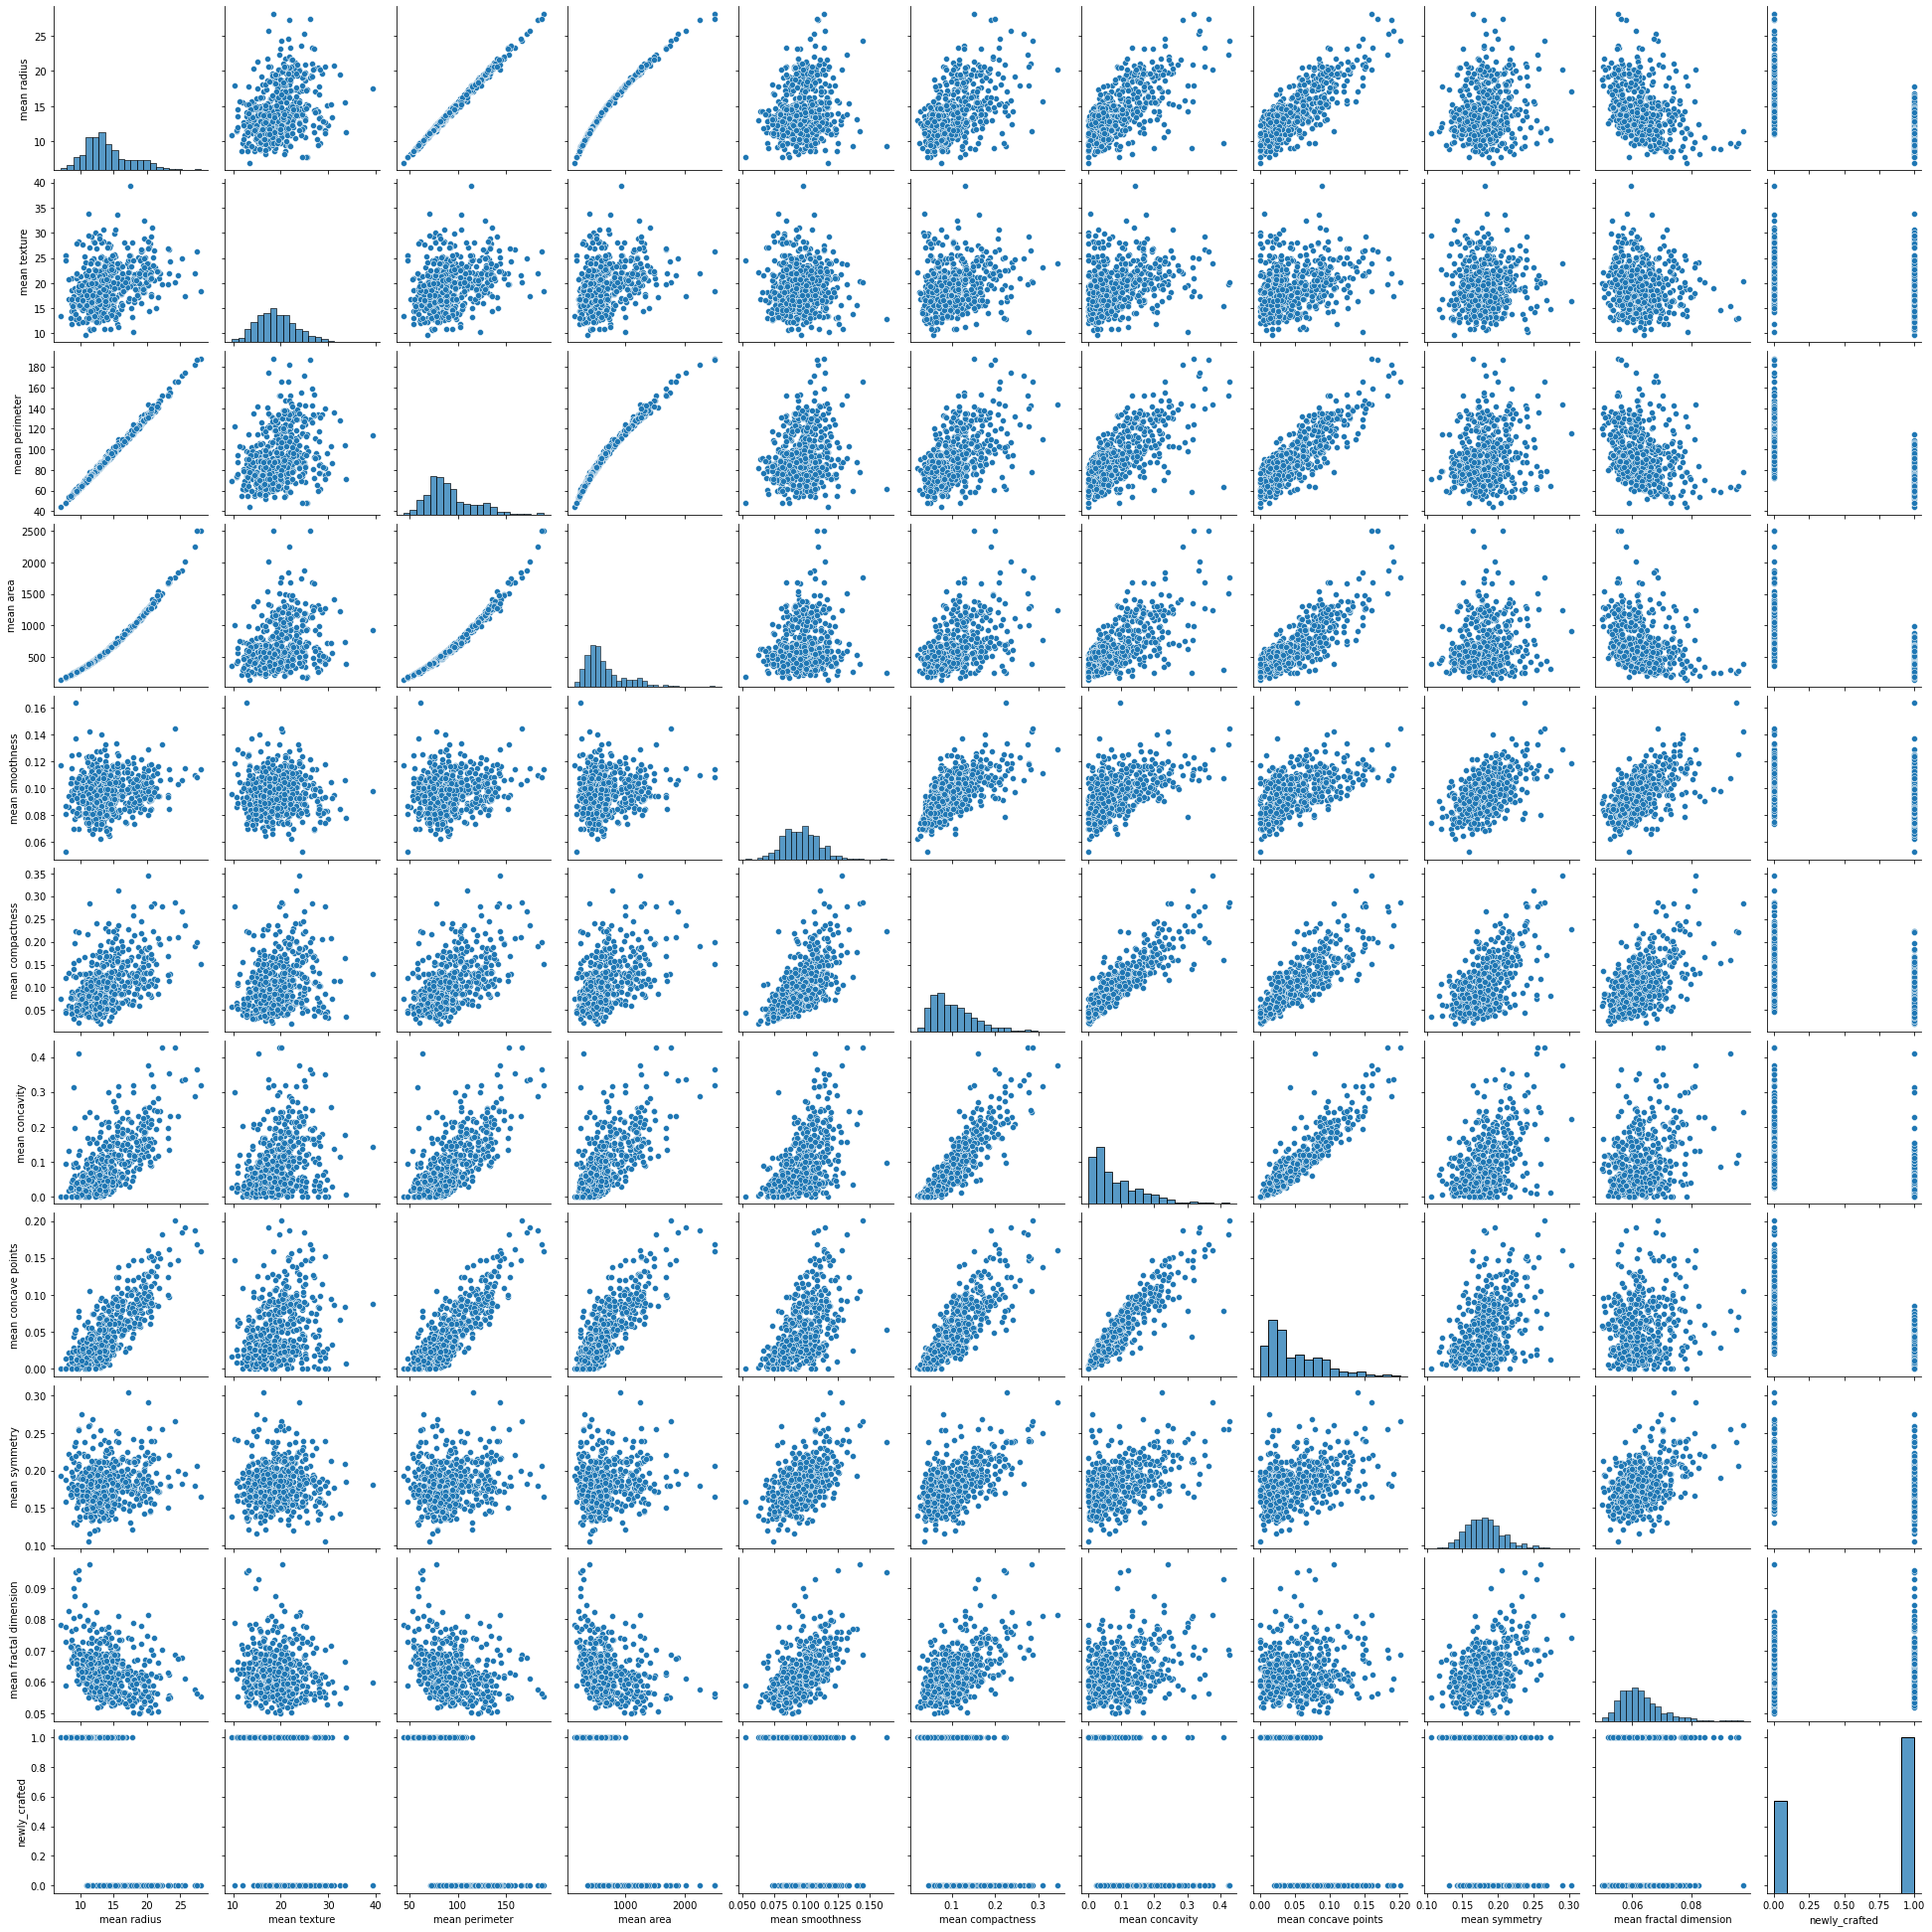

In [27]:
mean_data['newly_crafted'] = tree.predict(mean_data)

plt.figure(figsize=[12,12],dpi=300)
sns.pairplot(mean_data)
plt.show()

## 